# Customer Service Requests Analysis

### NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\Python\311_Service.csv")

In [4]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
df.shape

(300698, 53)

In [6]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
Unique Key                        300698 non-null int64
Created Date                      300698 non-null object
Closed Date                       298534 non-null object
Agency                            300698 non-null object
Agency Name                       300698 non-null object
Complaint Type                    300698 non-null object
Descriptor                        294784 non-null object
Location Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type                      29

### Lets check for missing values 

In [8]:
missing_df = df.isnull().sum(axis=0).reset_index()

In [9]:
missing_df.columns = ['column','count']

In [10]:
missing_df = missing_df[missing_df['count']>0]

In [11]:
missing_df =missing_df.sort_values('count',ascending=False)

In [12]:
missing_df

,column,count
39,School or Citywide Complaint,300698
40,Vehicle Type,300698
41,Taxi Company Borough,300698
42,Taxi Pick Up Location,300698
47,Garage Lot Name,300698
48,Ferry Direction,300697
49,Ferry Terminal Name,300696
46,Bridge Highway Segment,300485
45,Road Ramp,300485
44,Bridge Highway Direction,300455


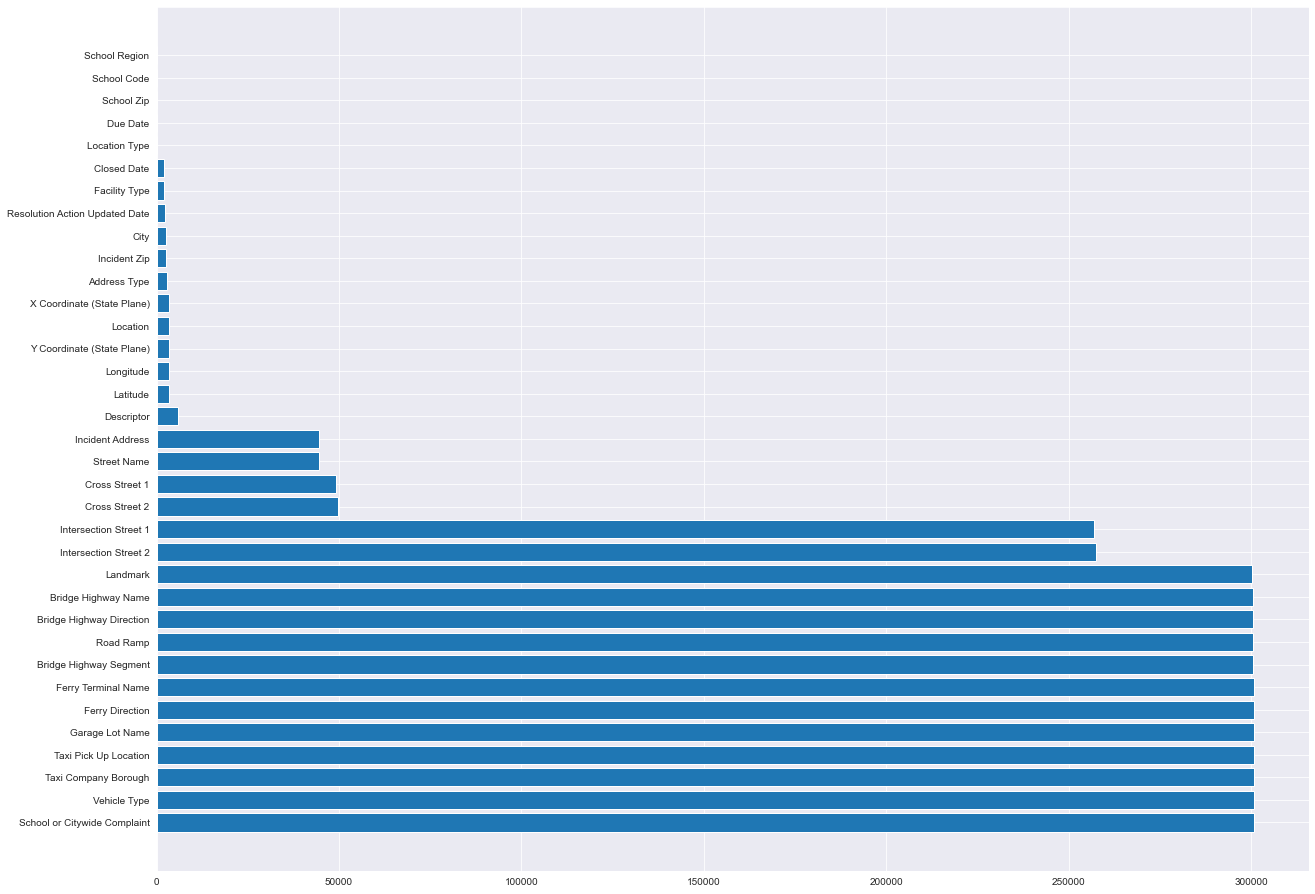

In [13]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,12))
ax = fig.add_axes([0,0,1,1])
ax.barh(missing_df['column'],missing_df['count'])
plt.show()

In [14]:
#From the above graph looks like after the column intersection street 1 have high null values.. So we will drop those colums

In [15]:
na_columns = missing_df.head(18)

In [16]:
na_columns

,column,count
39,School or Citywide Complaint,300698
40,Vehicle Type,300698
41,Taxi Company Borough,300698
42,Taxi Pick Up Location,300698
47,Garage Lot Name,300698
48,Ferry Direction,300697
49,Ferry Terminal Name,300696
46,Bridge Highway Segment,300485
45,Road Ramp,300485
44,Bridge Highway Direction,300455


In [17]:
# Lets drop these columns
df =df.drop(na_columns['column'],axis=1)

In [18]:
df.isna().sum()

Unique Key                           0
Created Date                         0
Closed Date                       2164
Agency                               0
Agency Name                          0
Complaint Type                       0
Descriptor                        5914
Location Type                      131
Incident Zip                      2615
Address Type                      2815
City                              2614
Facility Type                     2171
Status                               0
Due Date                             3
Resolution Description               0
Resolution Action Updated Date    2187
Community Board                      0
Borough                              0
X Coordinate (State Plane)        3540
Y Coordinate (State Plane)        3540
Park Facility Name                   0
Park Borough                         0
School Name                          0
School Number                        0
School Region                        1
School Code              

#### Lets check on others null values in column
#### Closed Date - Null values might be because of the service request is not in the state closed or resolved. 
#### Lets validate the same

In [19]:
df[df['Status'] != 'Closed']['Closed Date'].isna().sum()

2164

In [20]:
# We could figure out that closed date null values are because of they are not closed or resolved

In [21]:
df[df['Status'] != 'Closed']['Resolution Action Updated Date'].isna().sum()

2185

 #### We will impute the null values in closed day,resolution action updated date as today.. This might be logically incorrect but we dont want to remove those records so for now will impute the today date 


In [23]:
from datetime import date

In [24]:
today = date.today()

In [25]:
df['Closed Date'] = df['Closed Date'].fillna(today)

In [26]:
df['Resolution Action Updated Date'] = df['Resolution Action Updated Date'].fillna(today)

In [27]:
## Lets remove the rows with null values in other columns

In [28]:
data_df = df.dropna(axis=0)

In [29]:
data_df.isna().sum()

Unique Key                        0
Created Date                      0
Closed Date                       0
Agency                            0
Agency Name                       0
Complaint Type                    0
Descriptor                        0
Location Type                     0
Incident Zip                      0
Address Type                      0
City                              0
Facility Type                     0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
X Coordinate (State Plane)        0
Y Coordinate (State Plane)        0
Park Facility Name                0
Park Borough                      0
School Name                       0
School Number                     0
School Region                     0
School Code                       0
School Phone Number               0
School Address              

In [30]:
# Lets explore the data

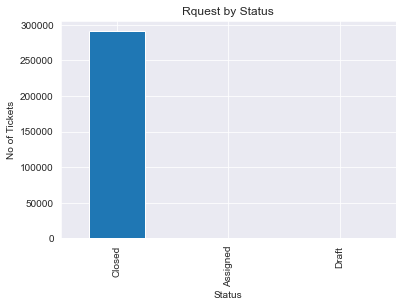

In [31]:
data_df['Status'].value_counts().plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('No of Tickets')
plt.title('Rquest by Status')
plt.show()

In [32]:
data_df['Status'].value_counts().head(1)[0] / df.shape[0]

0.9673592774145489

#### Looks like 96 % of the request are closed

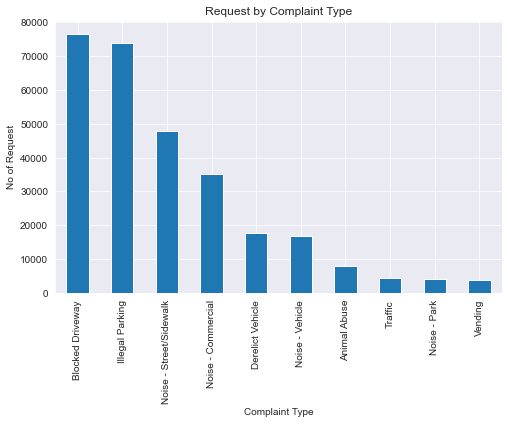

In [34]:
plt.figure(figsize=(8,5))
data_df['Complaint Type'].value_counts().head(10).plot(kind='bar',title="Plot")
plt.xlabel('Complaint Type')
plt.ylabel('No of Request')
plt.title('Request by Complaint Type')
plt.show()

#### We could see that Blocked Driveway and illegal parking complaint types plays the major role nearly 50 % and noise related complaints plays about 33 % 
##### Lets check for least complaint types

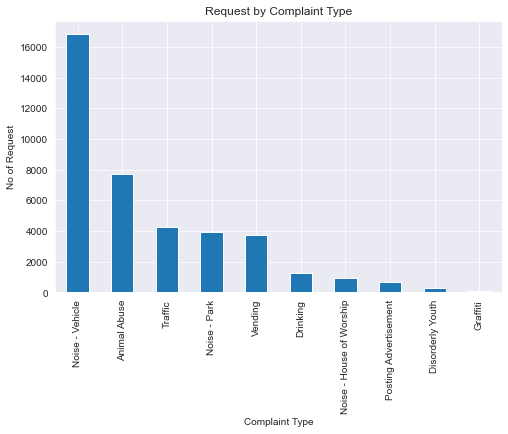

In [35]:
plt.figure(figsize=(8,5))
data_df['Complaint Type'].value_counts().tail(10).plot(kind='bar',title="Plot")
plt.xlabel('Complaint Type')
plt.ylabel('No of Request')
plt.title('Request by Complaint Type')
plt.show()

#### Volume of request by city wise

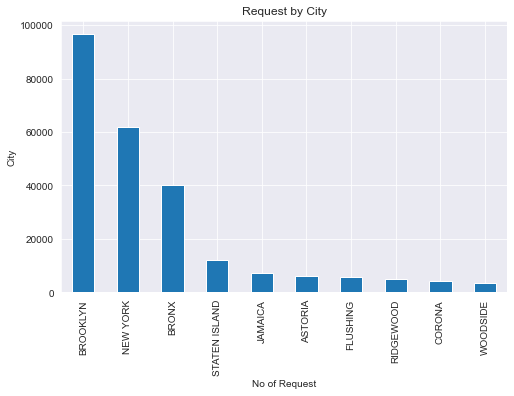

In [91]:
plt.figure(figsize=(8,5))
data_df['City'].value_counts().head(10).plot(kind='bar',title="Plot")
plt.xlabel('No of Request')
plt.ylabel('City')
plt.title('Request by City')
plt.show()

In [39]:
data_df['City'].value_counts().head(1)[0] / data_df.shape[0]

0.3328256975980694

#### The city BROOKLYN has the most no of request / complaints

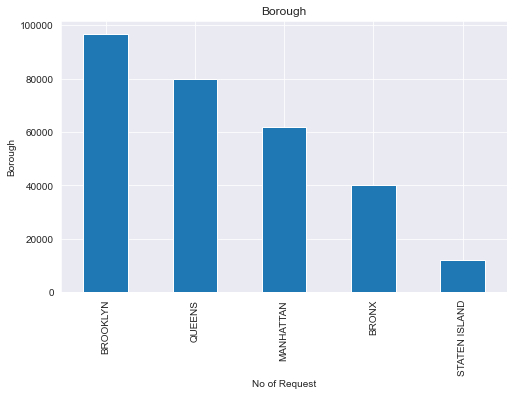

In [41]:
plt.figure(figsize=(8,5))
data_df['Borough'].value_counts().head(10).plot(kind='bar',title="Plot")
plt.xlabel('No of Request')
plt.ylabel('Borough')
plt.title('Borough')
plt.show()

In [42]:
# Lets check for agency

In [43]:
data_df['Agency Name'].value_counts().reset_index()

,index,Agency Name
0,New York City Police Department,290891


#### New York City Police Department is the only agency where the complaint request where assigned

#### Lets explore on when the request created,monthly trend and resolving time

In [44]:
import datetime

In [45]:
data_df['Created Date'] = pd.to_datetime(data_df['Created Date'])

In [46]:
data_df['Closed Date'] = pd.to_datetime(data_df['Closed Date'])

In [47]:
data_df['Due Date'] = pd.to_datetime(data_df['Due Date'])

In [48]:
data_df['Resolution Action Updated Date'] = pd.to_datetime(data_df['Resolution Action Updated Date'])

In [49]:
data_df['Created_month'] = data_df['Created Date'].dt.month
data_df['Created_year'] = data_df['Created Date'].dt.year
data_df['Created_date'] =data_df['Created Date'].dt.day
data_df['Created_hour'] = data_df['Created Date'].dt.hour
data_df['Created_quarter'] = data_df['Created Date'].dt.quarter
data_df['Created_day_of_week'] = data_df['Created Date'].dt.dayofweek

### Lets explore resolving time of request.. We will only take the request that are closed/resolved 

In [50]:
hist_data = data_df[data_df['Status']=='Closed']

In [51]:
hist_data.shape

(290883, 41)

In [52]:
hist_data['resolved_time'] = hist_data['Closed Date'] - hist_data['Created Date']

In [53]:
## Lets convert resolved time in hours

In [54]:
hist_data['resolved_time'] = hist_data['resolved_time'].apply(lambda x: int(x.total_seconds() / 3600))

In [55]:
hist_data['resolved_time'].describe()

count    290883.000000
mean          3.819144
std           6.064767
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max         592.000000
Name: resolved_time, dtype: float64

In [56]:
month  = hist_data.groupby(['Created_month']).agg({"resolved_time":"mean","Unique Key":"count"}).reset_index()

In [57]:
month.columns = ['created_month','resolved_time','count']

In [58]:
month

,created_month,resolved_time,count
0,3,3.284765,2409
1,4,3.198114,26621
2,5,3.436074,35189
3,6,3.643416,34264
4,7,3.727842,33216
5,8,3.850578,33643
6,9,4.008530,34116
7,10,4.141923,31658
8,11,4.105674,29979
9,12,4.290016,29788


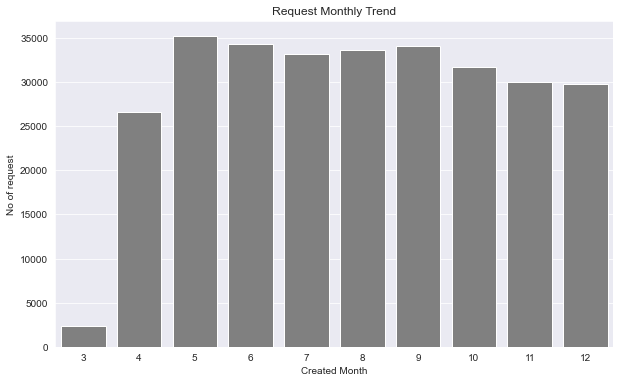

In [59]:
plt.figure(figsize=(10,6))
sns.barplot(month['created_month'],month['count'],color='grey')
plt.xlabel('Created Month')
plt.ylabel('No of request')
plt.title('Request Monthly Trend')
plt.show()

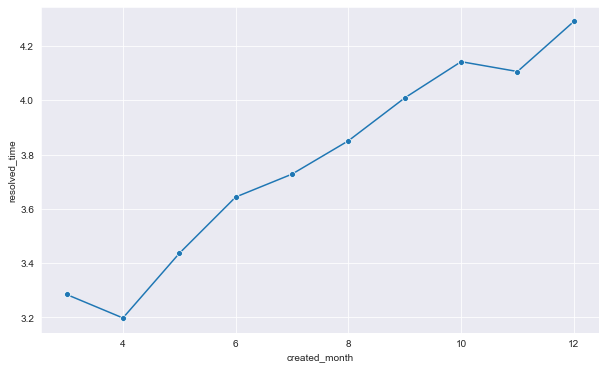

In [60]:
plt.figure(figsize=(10,6))
sns.lineplot(month['created_month'],month['resolved_time'],marker="o",dashes=False)
plt.show()

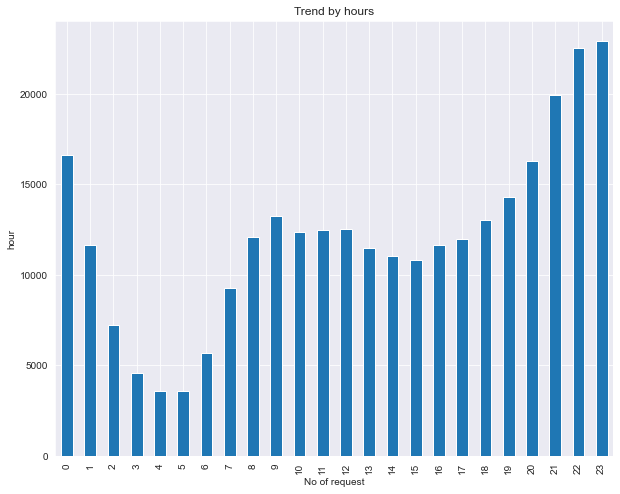

In [61]:
plt.figure(figsize=(10,8))
data_df['Created_hour'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('No of request')
plt.ylabel('hour')
plt.title("Trend by hours")
plt.show()

In [62]:
## This shows that after 8 PM the number of complaints are more

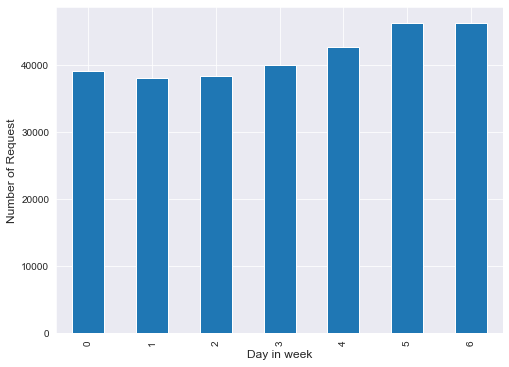

In [63]:
plt.figure(figsize=(8,6))
data_df['Created_day_of_week'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Day in week', fontsize=12)
plt.ylabel('Number of Request', fontsize=12)
plt.show()

In [64]:
resolved_time = hist_data.groupby(['Complaint Type']).agg({"resolved_time":"mean","Unique Key":"count"}).reset_index()

In [65]:
resolved_time

,Complaint Type,resolved_time,Unique Key
0,Animal Abuse,4.716906,7743
1,Blocked Driveway,4.240140,76676
2,Derelict Vehicle,6.862997,17496
3,Disorderly Youth,3.059649,285
4,Drinking,3.363780,1270
5,Graffiti,6.654867,113
6,Illegal Parking,3.992597,74021
7,Noise - Commercial,2.652373,35144
8,Noise - House of Worship,2.725000,920
9,Noise - Park,2.922842,3927


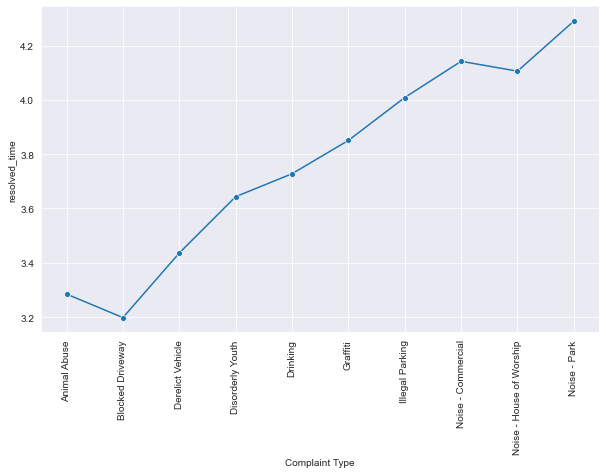

In [66]:
plt.figure(figsize=(10,6))
sns.lineplot(resolved_time['Complaint Type'],month['resolved_time'],marker="o",dashes=False)
plt.xticks(rotation = 90)
plt.show()

#### We could find that  Blocked Driveway has very less resolving time compared to other complaint types. Lets explore the Brookyln city which has most no of request

In [74]:
brooklyn = hist_data[hist_data['City'] =='BROOKLYN']

In [75]:
brooklyn.shape

(96814, 42)

<AxesSubplot:>

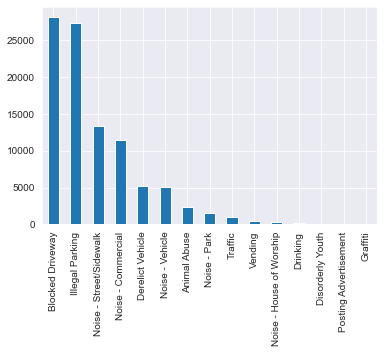

In [76]:
brooklyn['Complaint Type'].value_counts().plot(kind='bar')

In [77]:
Borough = brooklyn.groupby(['Complaint Type']).agg({"resolved_time":"mean","Unique Key":"count"}).reset_index()

In [78]:
Borough

,Complaint Type,resolved_time,Unique Key
0,Animal Abuse,4.339331,2390
1,Blocked Driveway,3.914648,28119
2,Derelict Vehicle,5.472583,5161
3,Disorderly Youth,3.638889,72
4,Drinking,3.038911,257
5,Graffiti,7.767442,43
6,Illegal Parking,3.777003,27386
7,Noise - Commercial,2.497162,11451
8,Noise - House of Worship,2.594675,338
9,Noise - Park,2.659076,1537


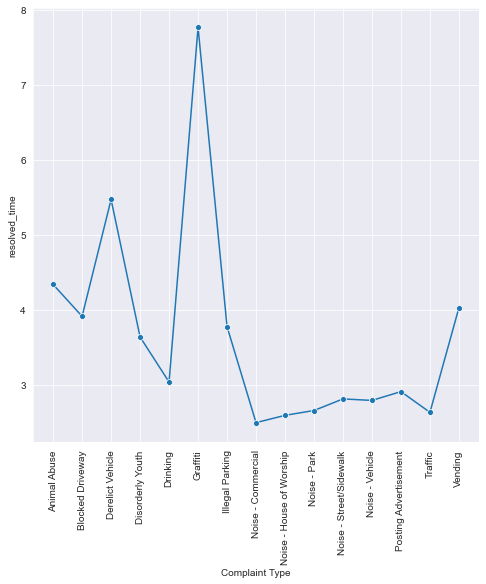

In [79]:
plt.figure(figsize=(8,8))
sns.lineplot(Borough['Complaint Type'],Borough['resolved_time'],marker="o",dashes=False)
plt.xticks(rotation = 90)
plt.show()

#### Brookyln has around average of 3.9 hrs for Blocked Driveway and 3.7 hrs for illegal parking. Let try to explore where these complaints are comming most

In [81]:
drive = data_df[(data_df['Complaint Type']=='Blocked Driveway')|(data_df['Complaint Type']=='Illegal Parking') & (data_df['City']== 'BROOKLYN')]

In [82]:
drive.shape

(104064, 41)

<Figure size 864x864 with 0 Axes>

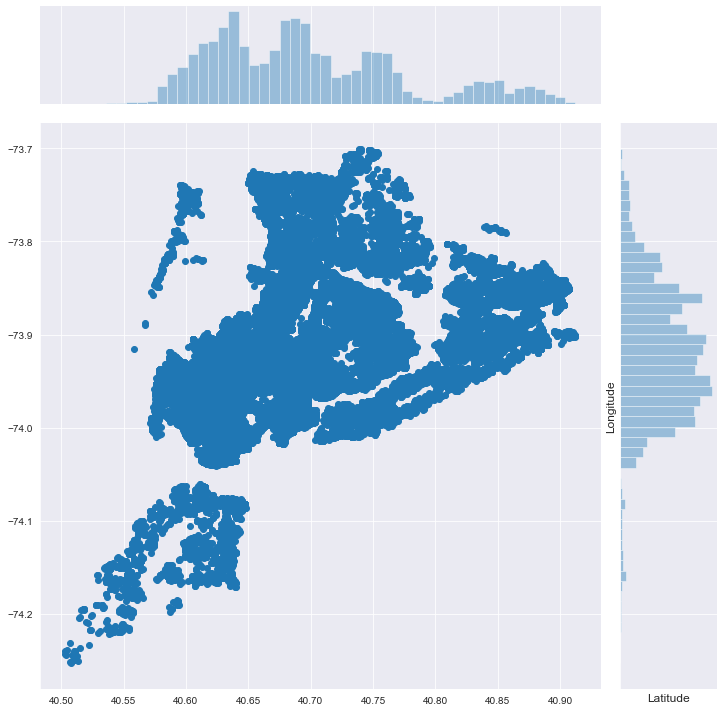

In [83]:
plt.figure(figsize=(12,12))
sns.jointplot(x=drive.Latitude.values, y=drive.Longitude.values, size=10,)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [84]:
#### We could not find much information this. Lets try hex 

<Figure size 864x864 with 0 Axes>

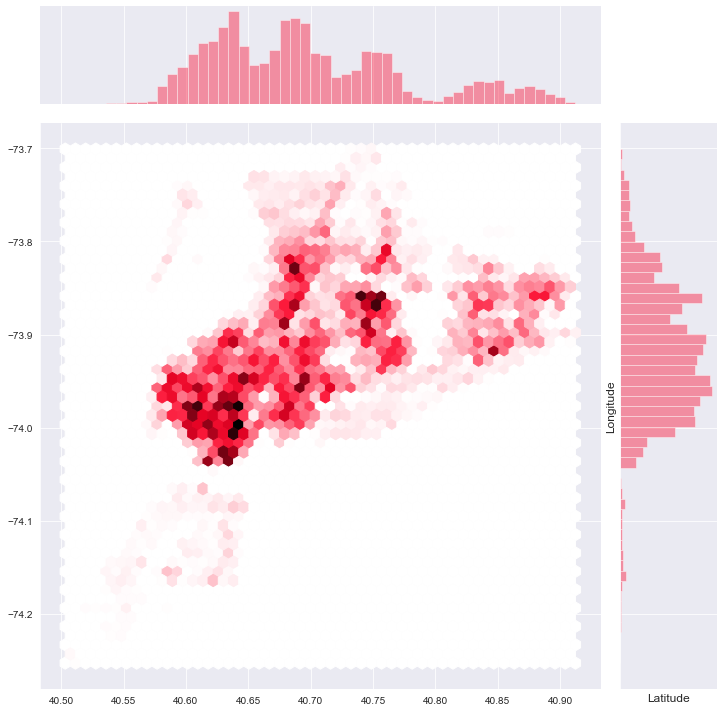

In [89]:
plt.figure(figsize=(12,12))
sns.jointplot(x=drive.Latitude.values, y=drive.Longitude.values,kind="hex", color="#fc0328", size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

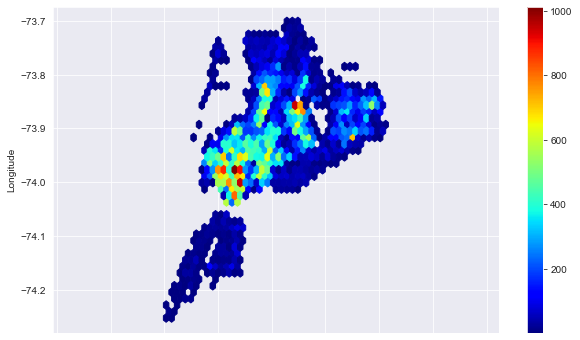

In [90]:
drive.plot(kind='hexbin',x='Latitude',y='Longitude',gridsize=40,colormap='jet',mincnt=1,figsize=(10,6)).axis('equal')
plt.show()

#### This is better . We can see the most complaints from central NYC

### Conclusion

#### From the exploration we conclude that nearly 50 % of complaints are blocked driveway and illegal parking  These two complaints might also inter connected because of illegal parking there can be a chance of blocked driveway in the city.The complaints after 8 PM for blocked driveway and illegal parking are about nearly 57 %. 
#### Brookyln has the most  (70 %) no of blocked driveway and illegal praking complaints.  2/3 of blocked driveway and illegal parking compaints where from Brookyln
#### We could see that resolving time for blocked driveway illegal parking are lesser (around 4 hrs) compared to others complaints..But this might differ for each city..
#### The other 33 % of complaints where based on the noise related issues.